In [1]:
import os
from tqdm import tqdm
import torch
import config
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from Dataset import WordDataset
from Generator import Generator
from torch.utils.data import DataLoader
from Discriminator import Discriminator
from utils import save_checkpoint, load_checkpoint, save_some_examples

c:\Users\devbh\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
VAL_DIR = "ConcatenatedImages/val"
MODEL_DIR = "Models/Epoch 58/gen.pth.tar"

gen = Generator(in_channels=1, features=64).to(config.DEVICE)
gen.eval()
opt_gen = optim.Adam(gen.parameters(), lr=config.LEARNING_RATE, betas=(0.5, 0.999))
load_checkpoint(os.path.normpath(os.path.join(os.getcwd(), MODEL_DIR)), gen, opt_gen, config.LEARNING_RATE)

=> Loading checkpoint


c:\Users\devbh\OneDrive\Desktop\College\Research\Original Gans Paper Implementation\Pix2Pix\utils.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.loa

In [3]:
val_dataset = WordDataset(root_dir=os.path.normpath(os.path.join(os.getcwd(), VAL_DIR)))
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

c:\Users\devbh\OneDrive\Desktop\College\Research\Original Gans Paper Implementation\Pix2Pix


  0%|          | 0/10 [00:00<?, ?it/s]

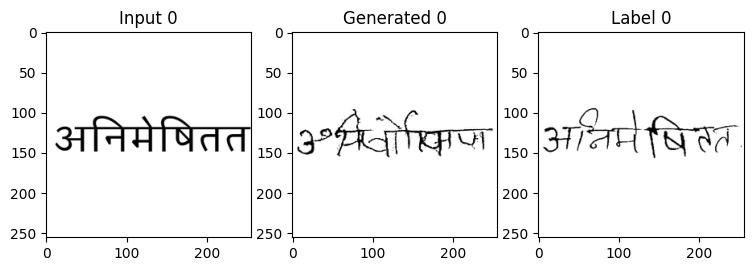

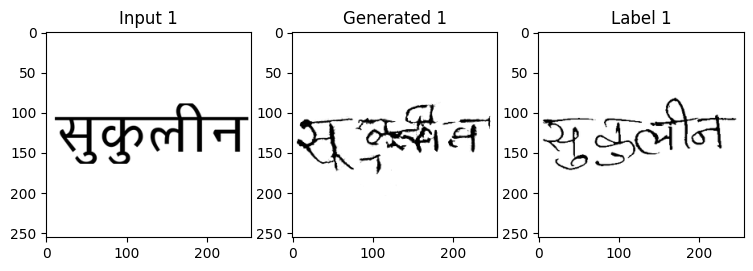

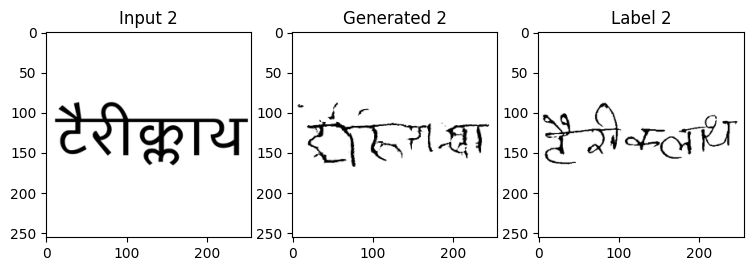

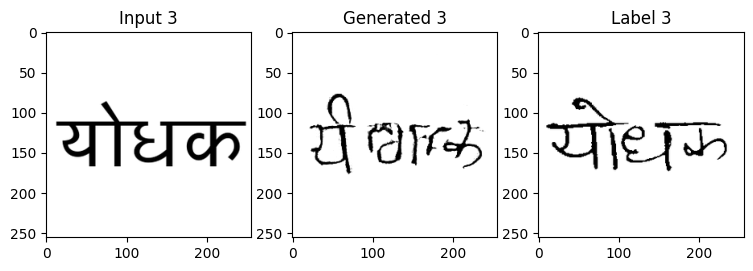

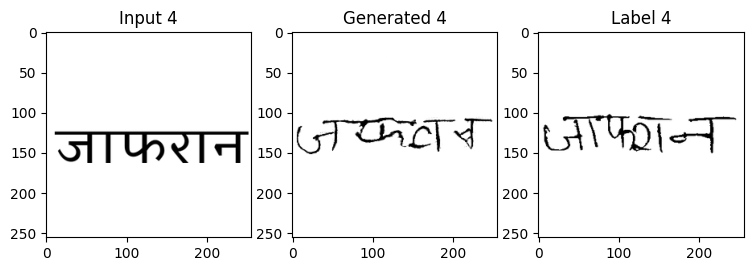

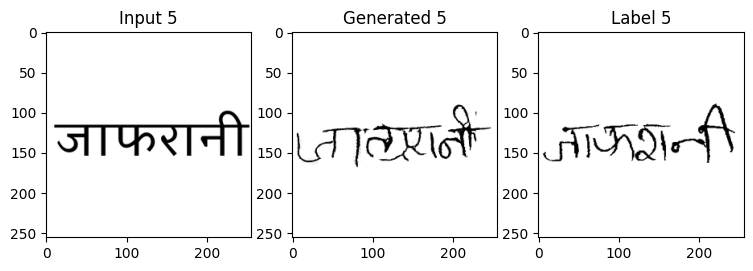

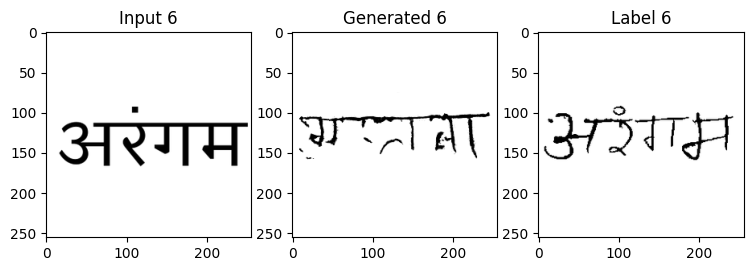

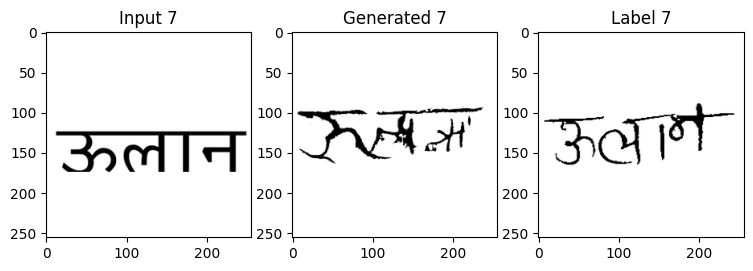

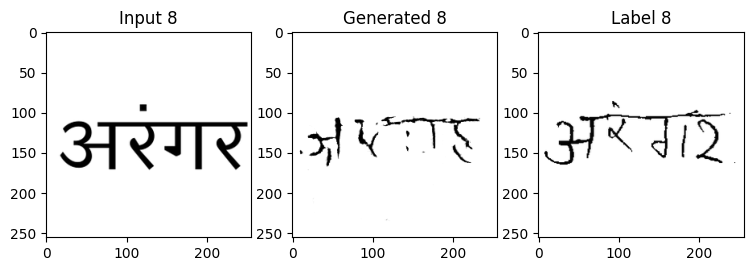

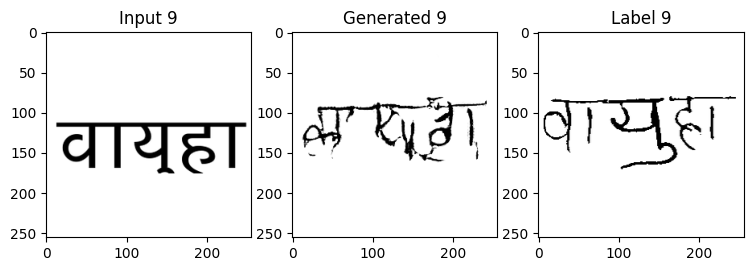

 10%|█         | 1/10 [00:01<00:12,  1.36s/it]

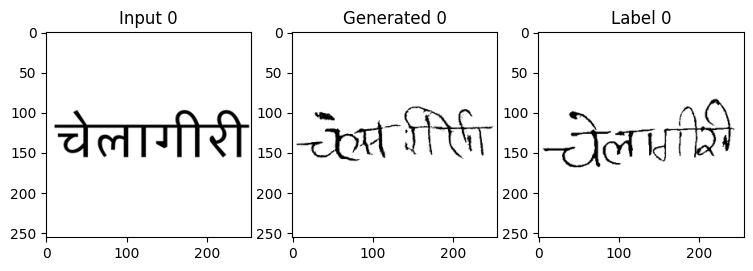

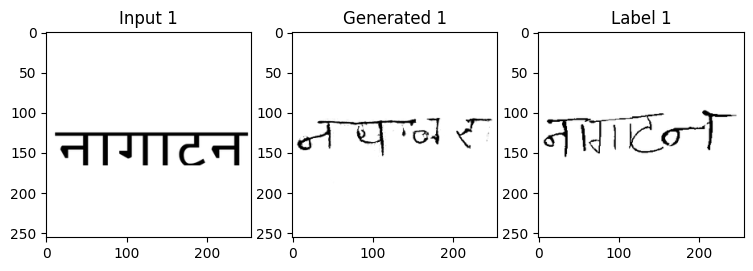

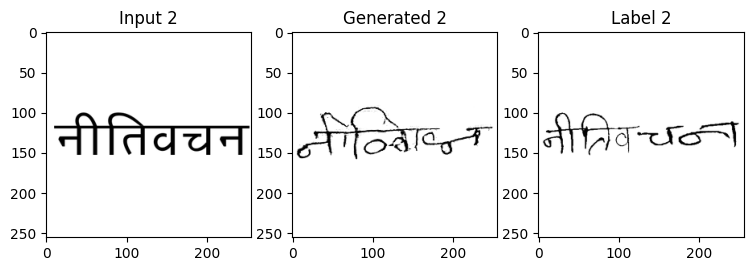

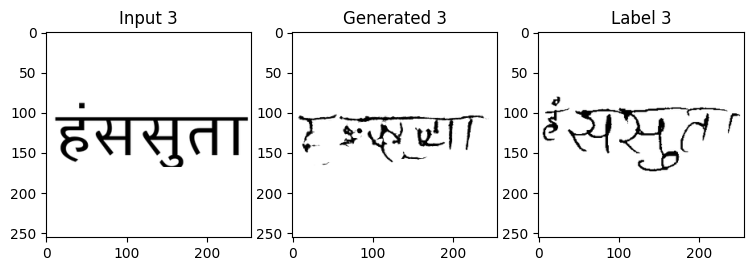

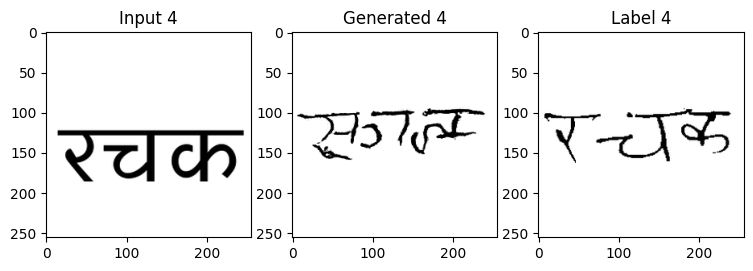

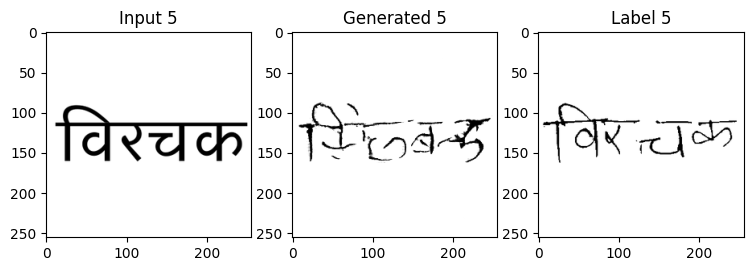

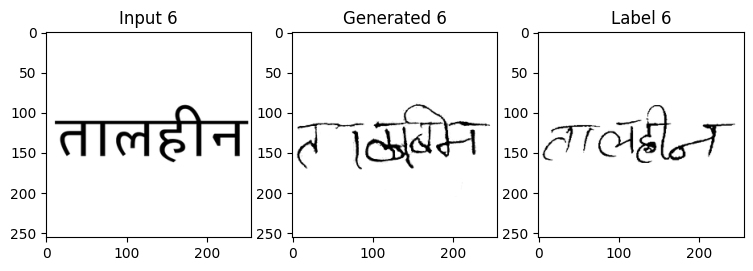

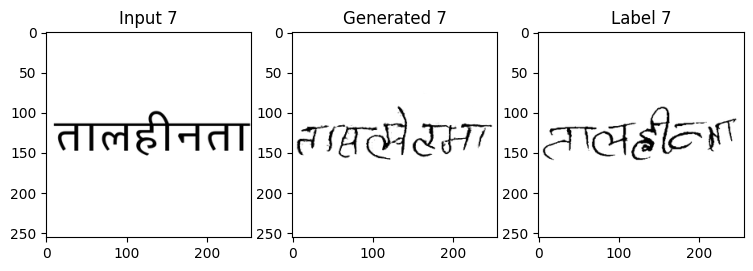

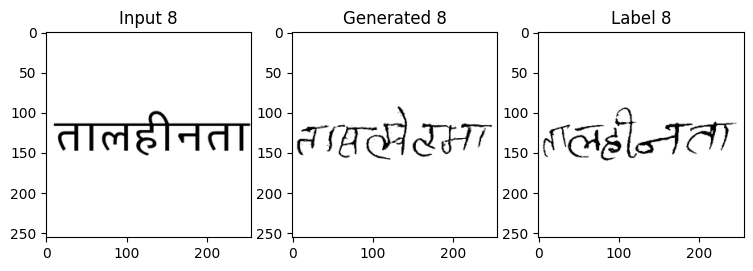

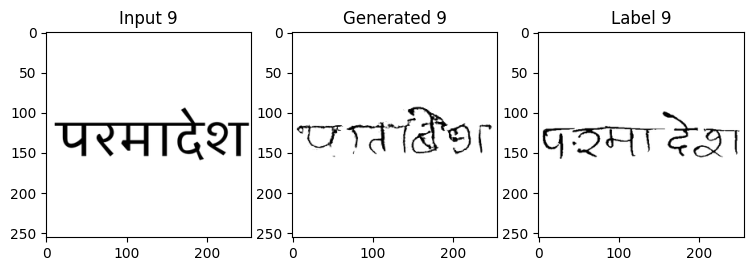

 20%|██        | 2/10 [00:02<00:11,  1.38s/it]

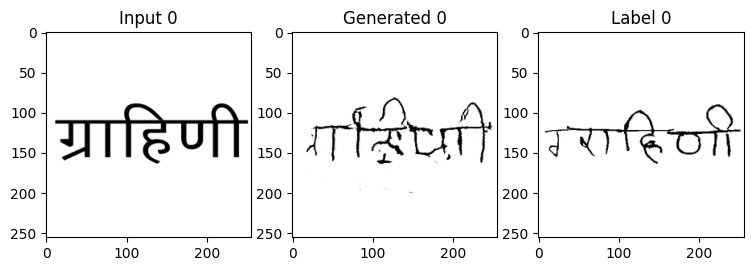

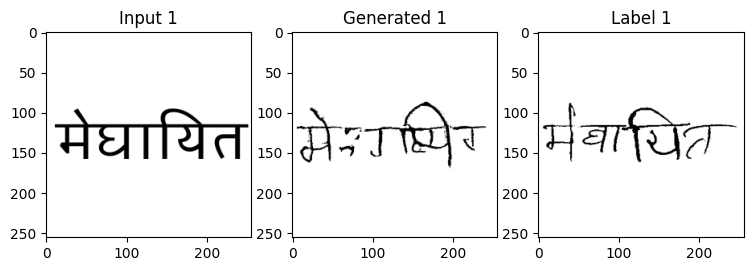

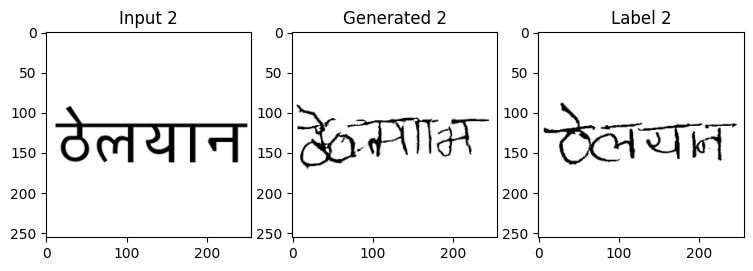

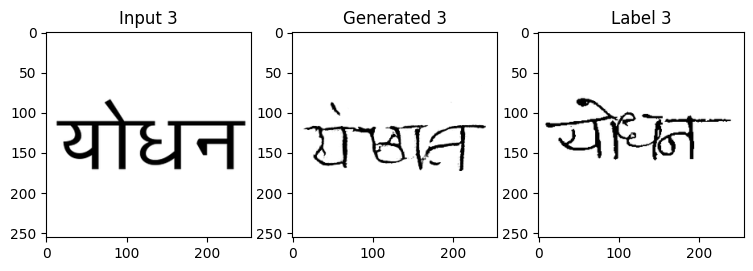

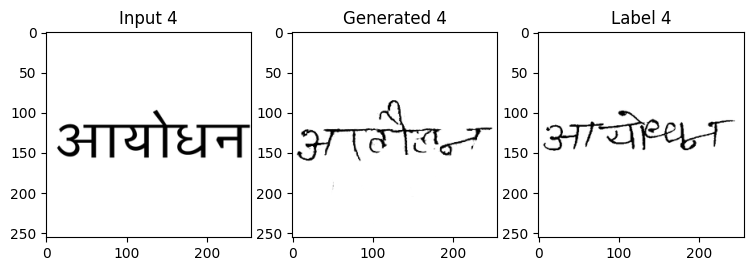

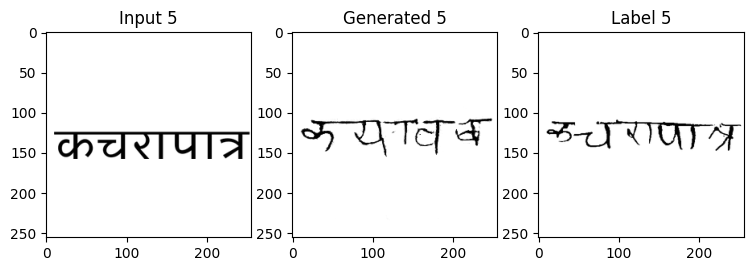

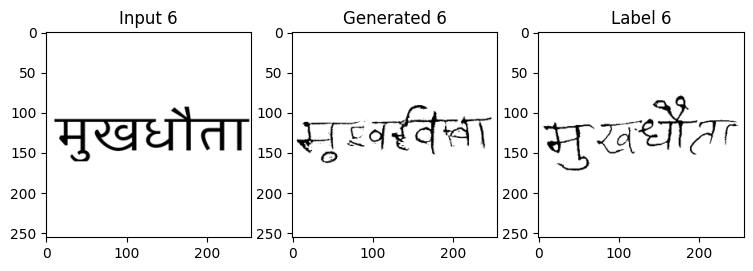

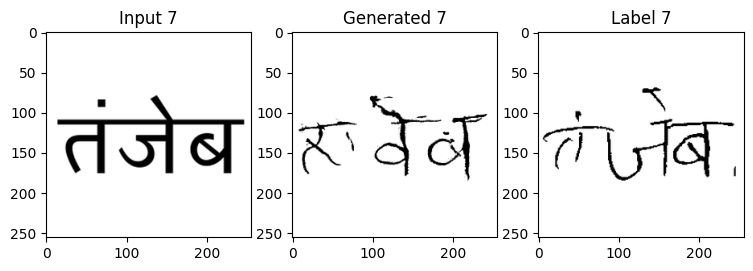

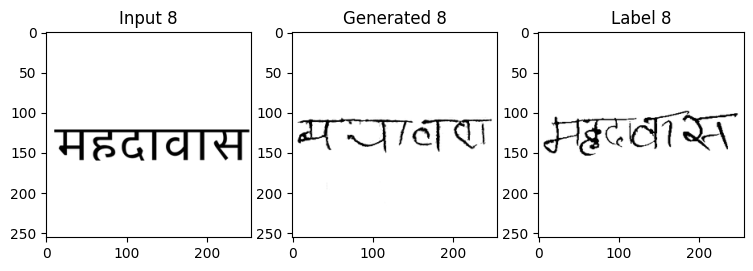

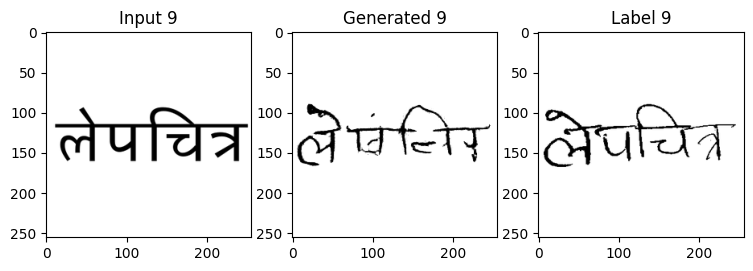

 30%|███       | 3/10 [00:04<00:09,  1.33s/it]

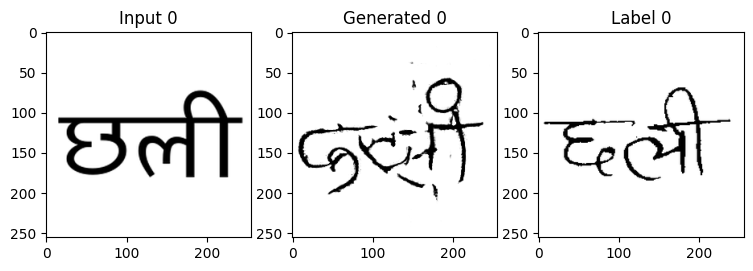

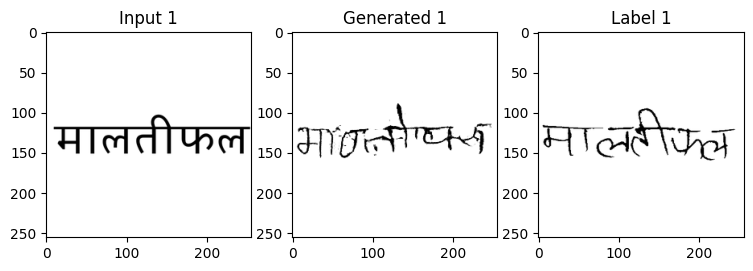

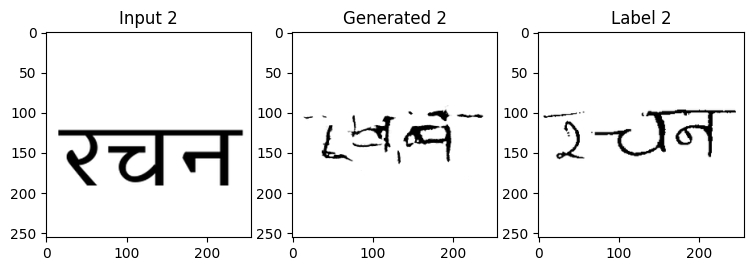

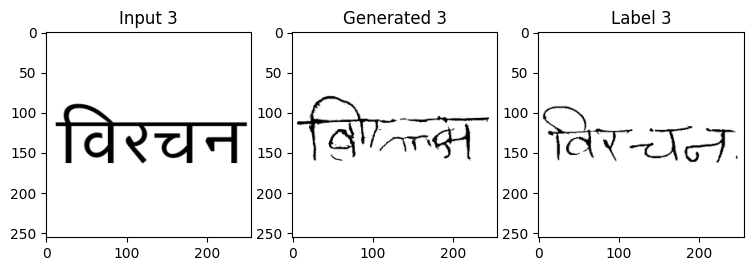

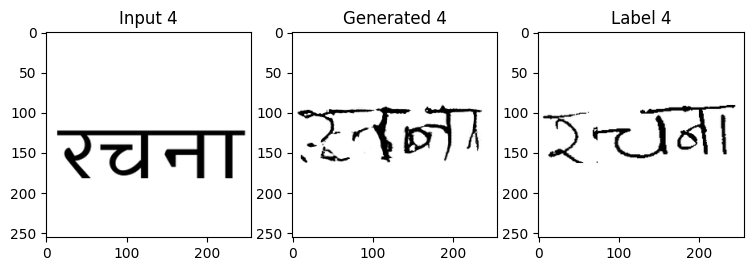

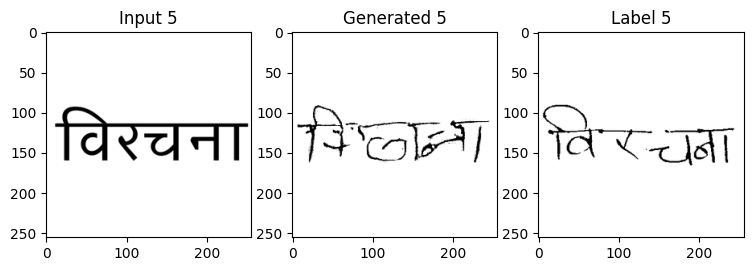

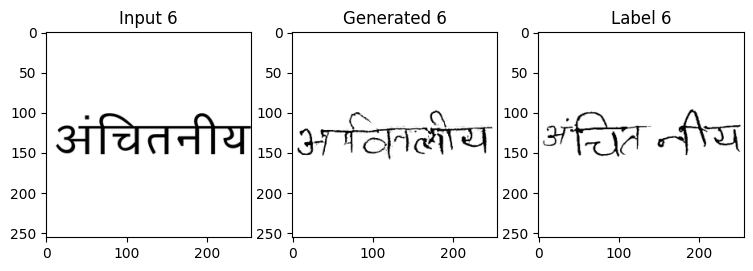

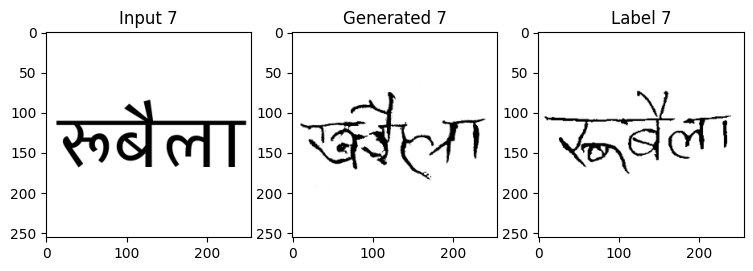

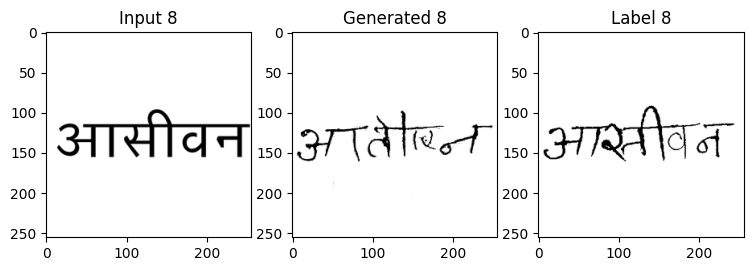

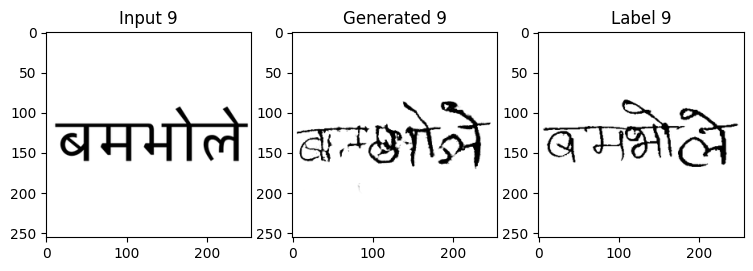

 40%|████      | 4/10 [00:05<00:08,  1.36s/it]

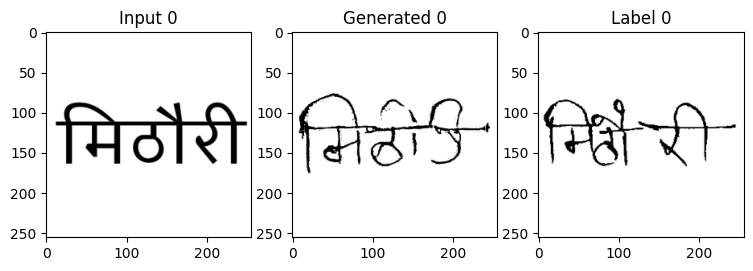

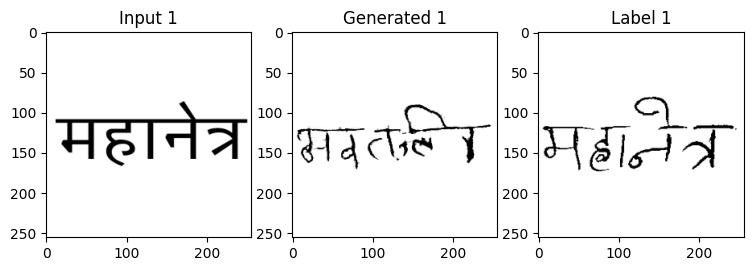

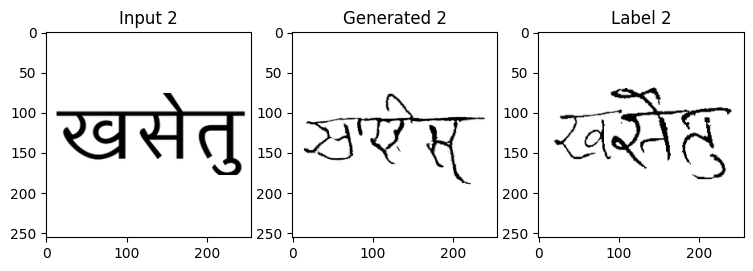

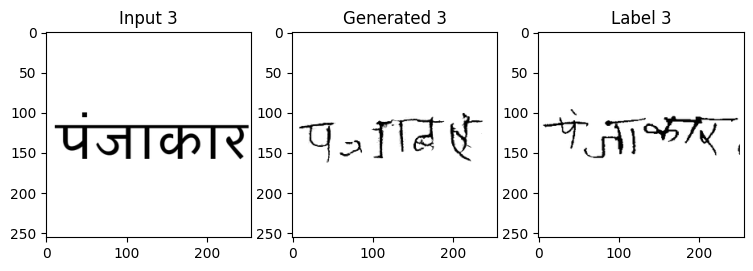

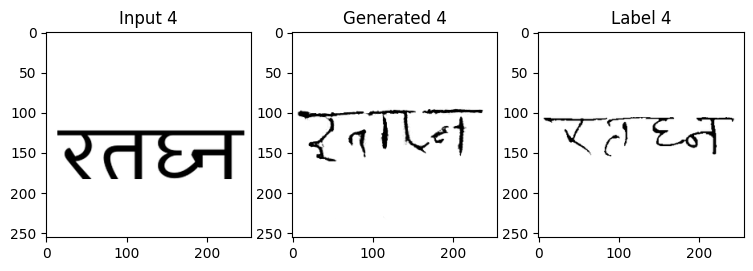

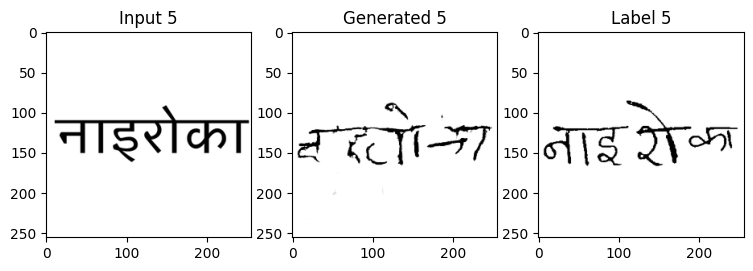

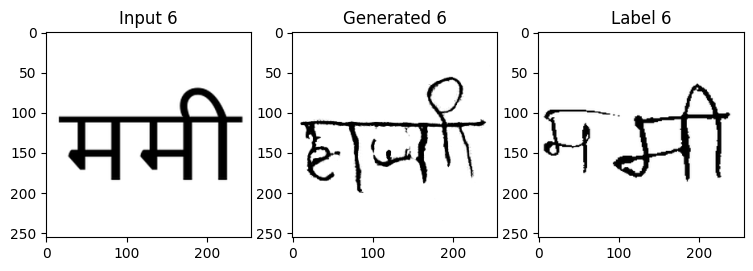

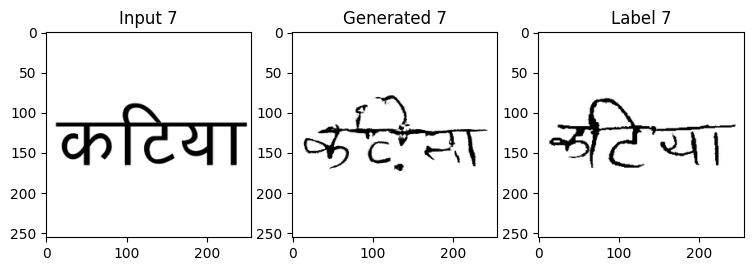

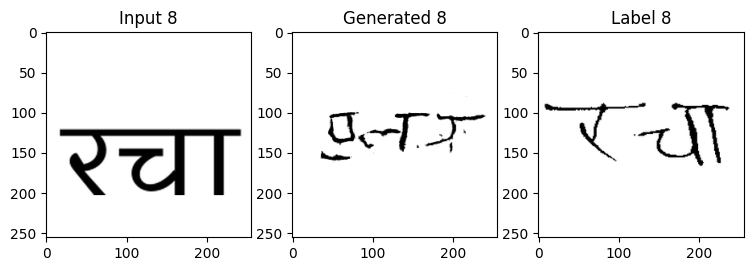

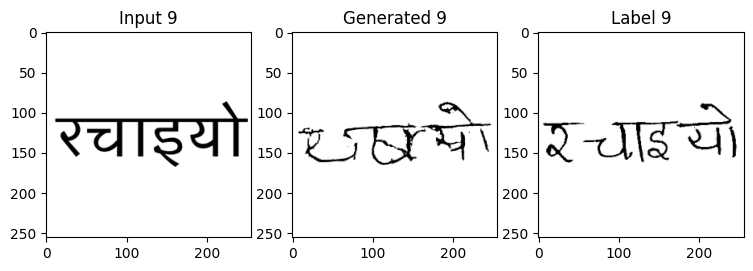

 50%|█████     | 5/10 [00:06<00:06,  1.37s/it]

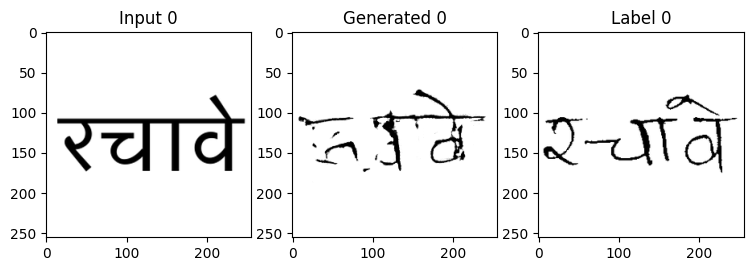

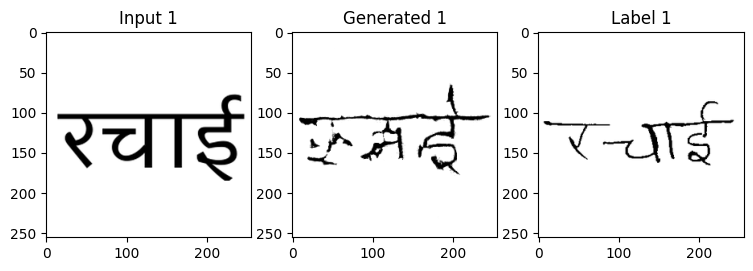

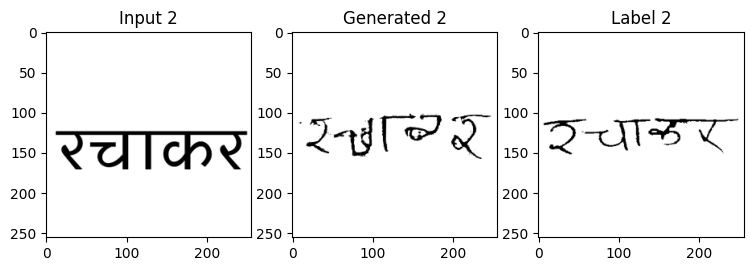

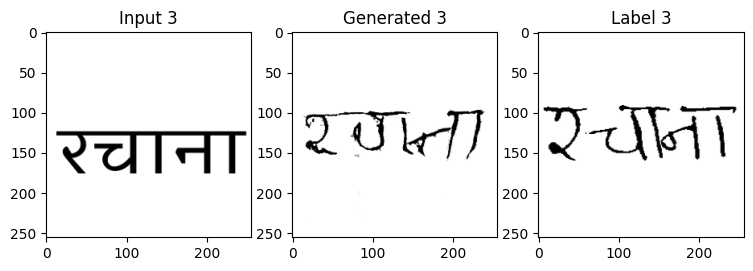

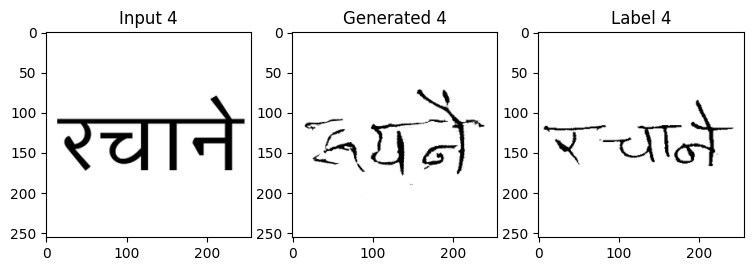

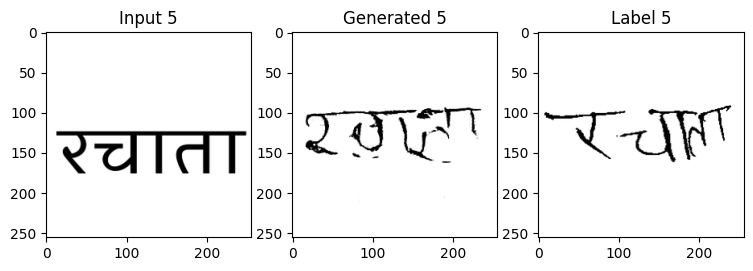

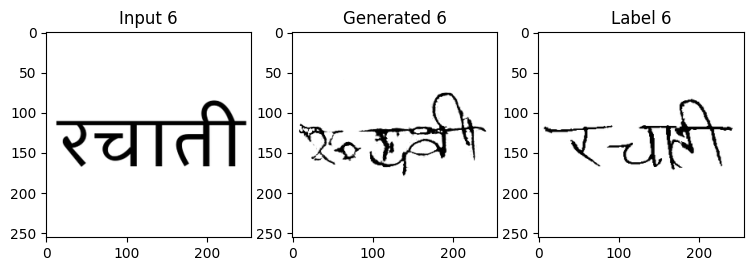

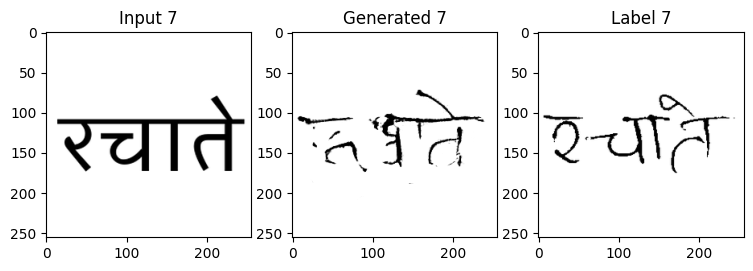

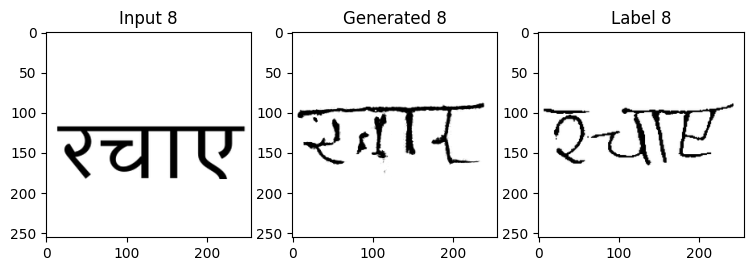

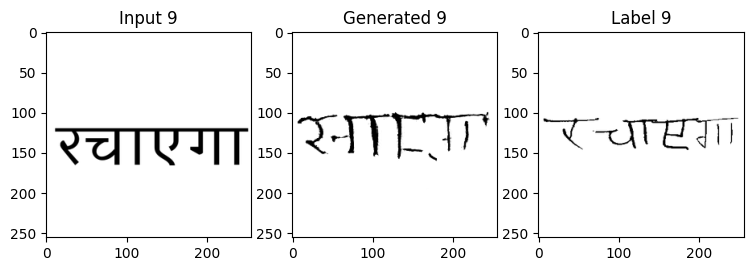

 60%|██████    | 6/10 [00:08<00:05,  1.37s/it]

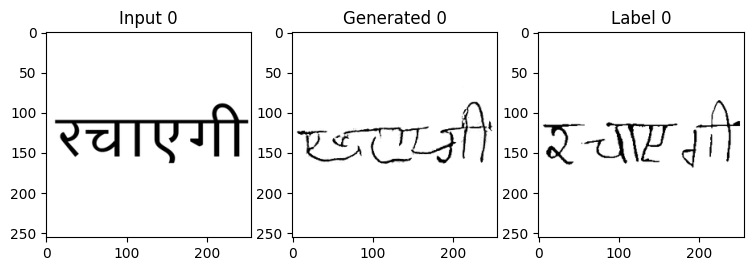

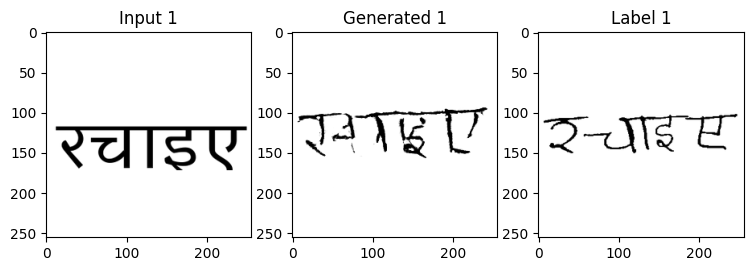

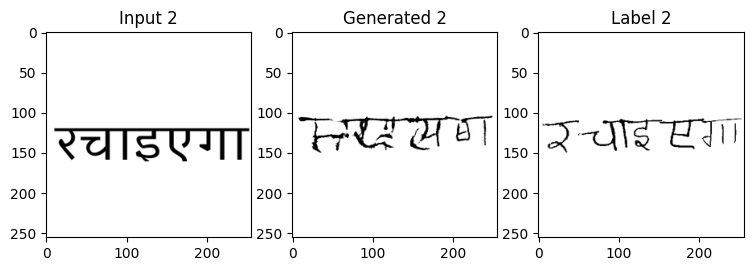

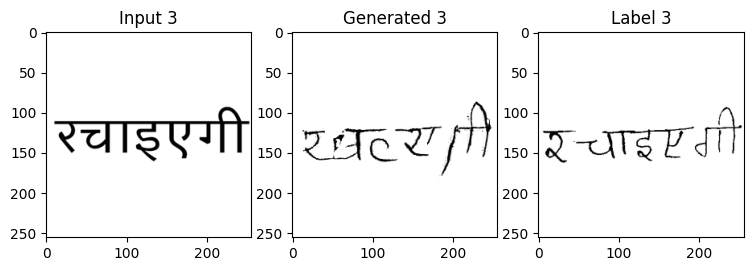

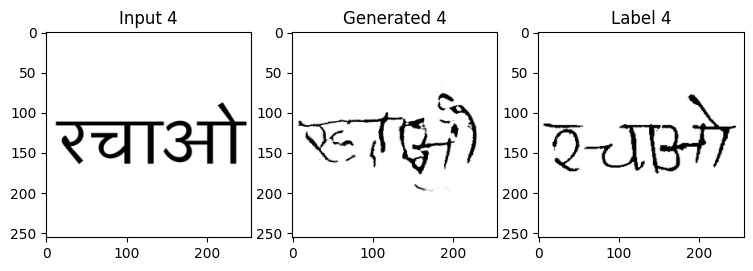

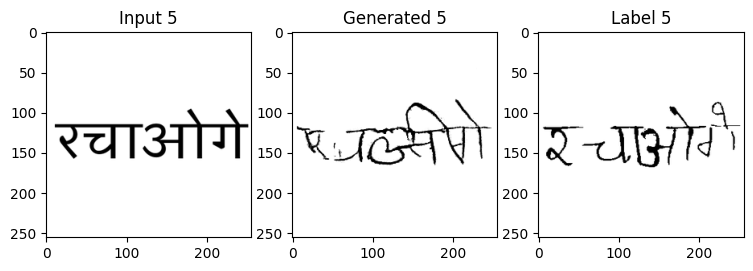

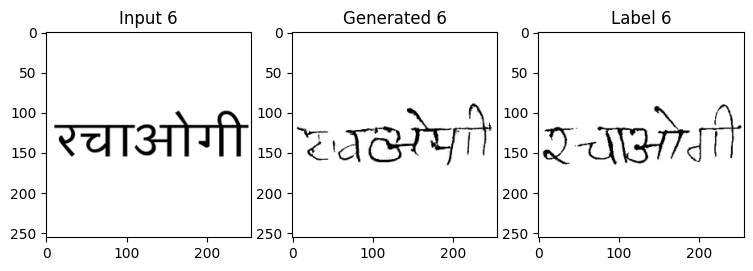

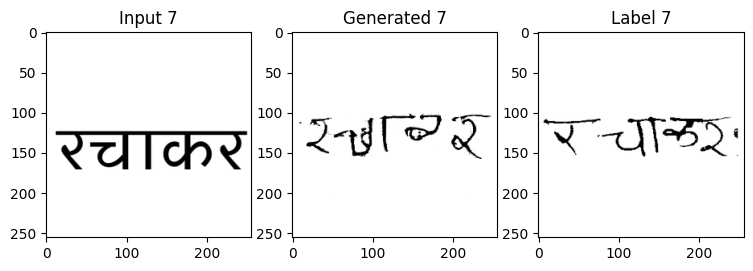

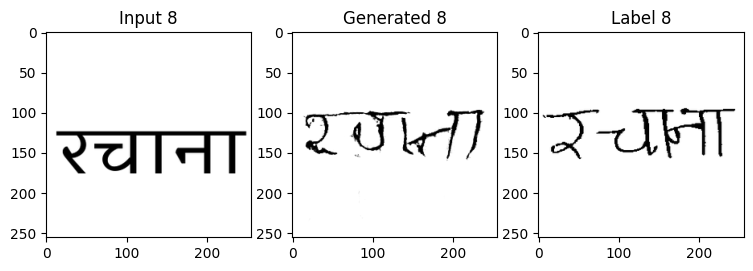

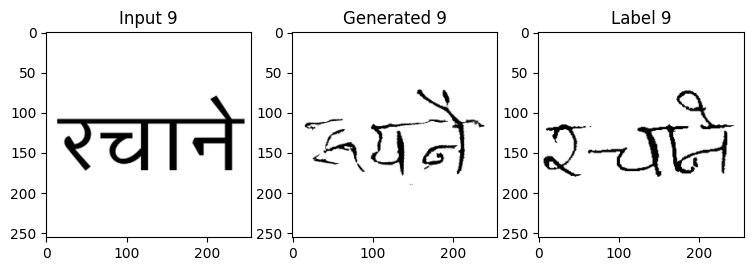

 70%|███████   | 7/10 [00:09<00:04,  1.42s/it]

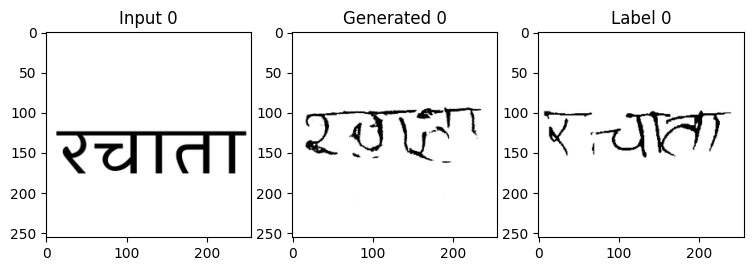

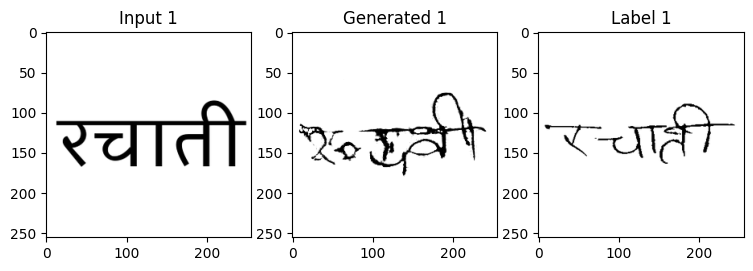

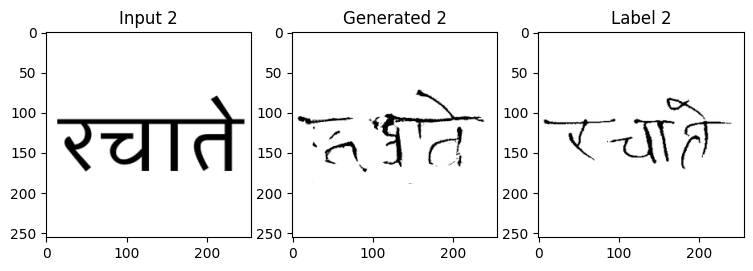

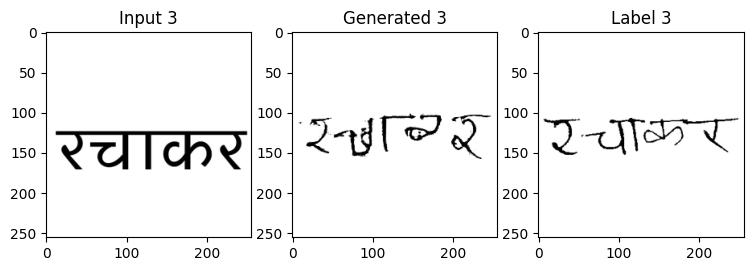

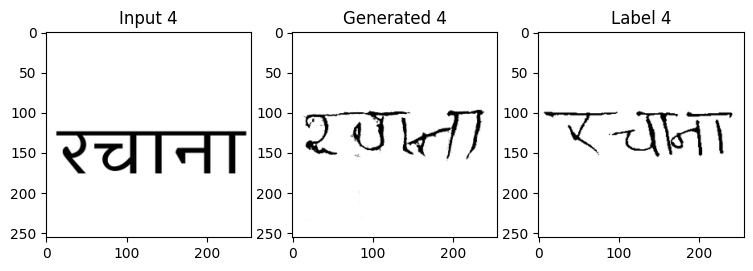

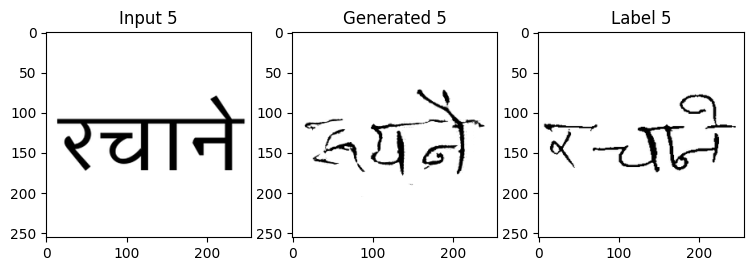

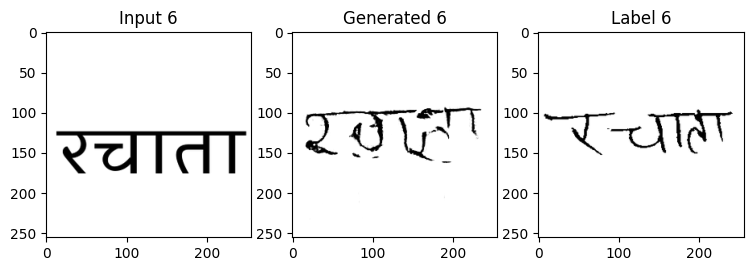

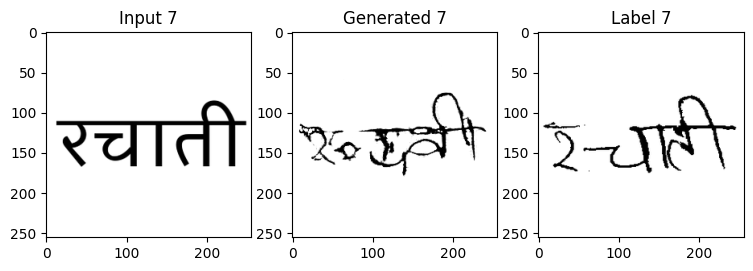

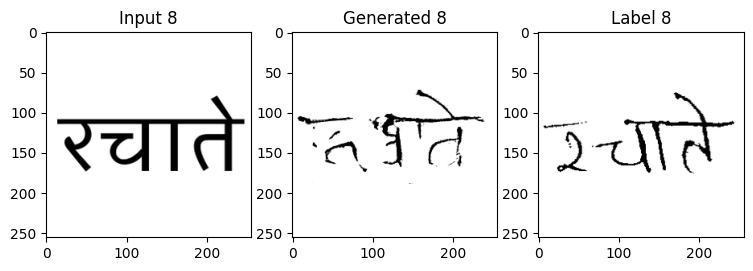

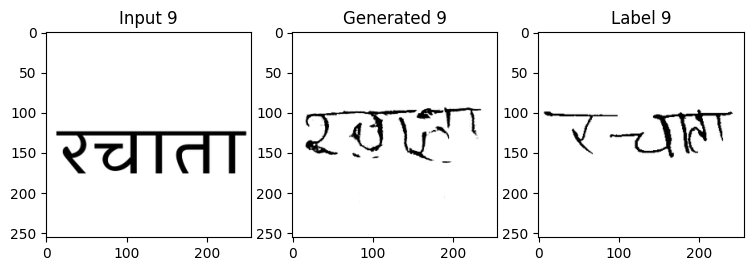

 80%|████████  | 8/10 [00:11<00:02,  1.39s/it]

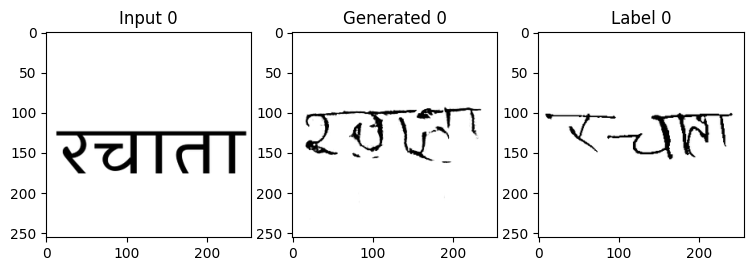

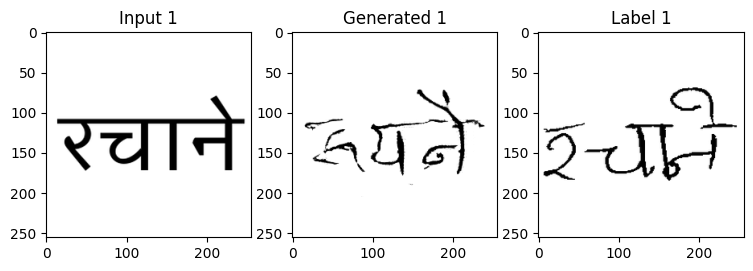

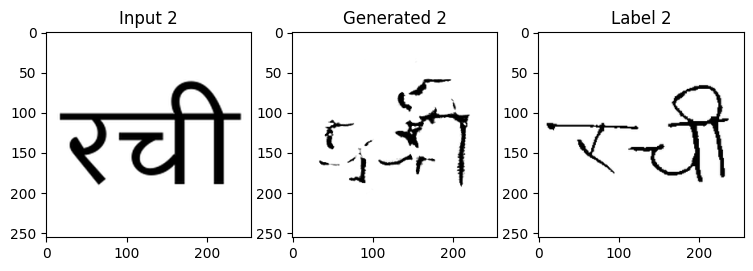

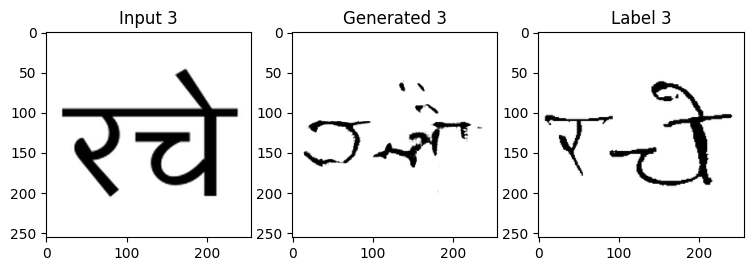

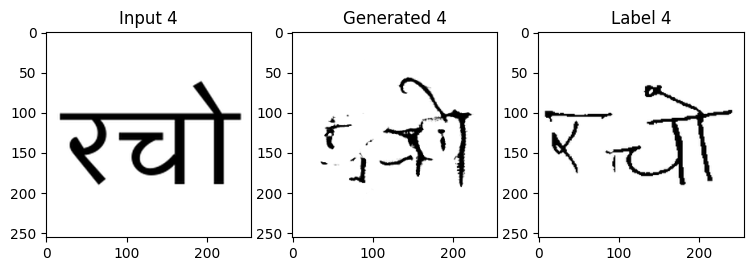

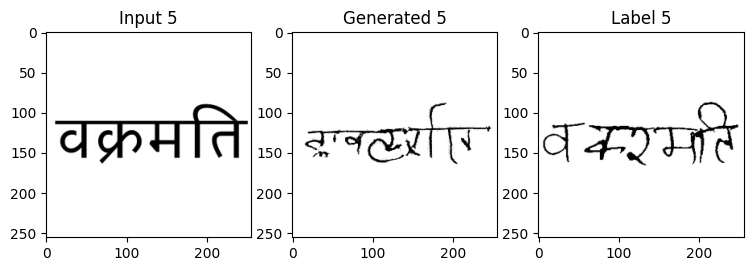

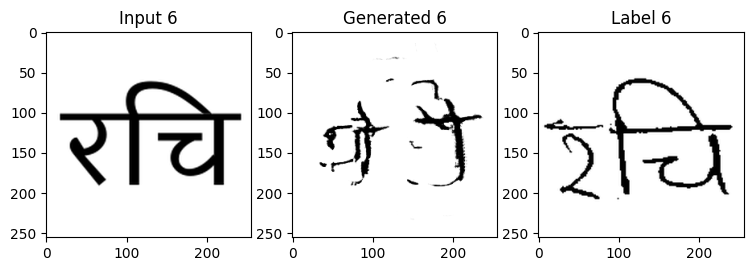

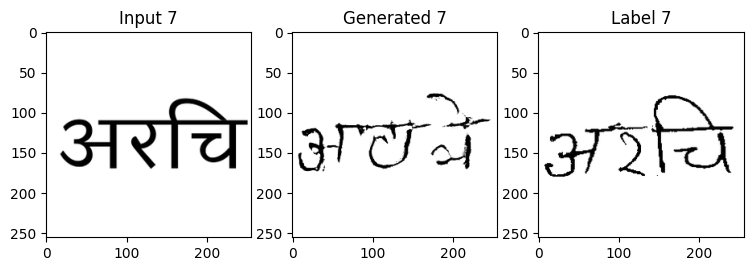

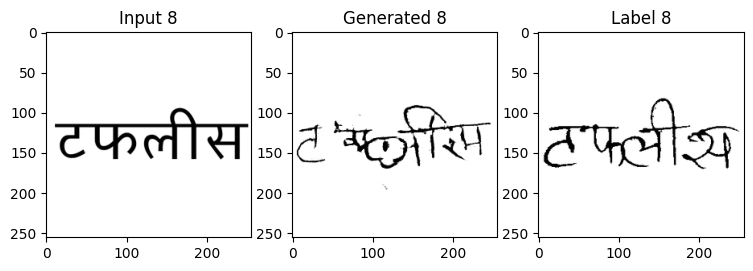

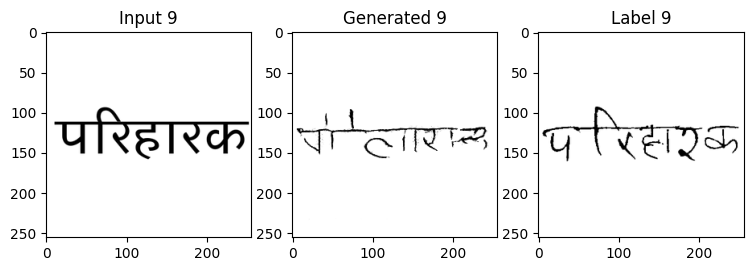

 90%|█████████ | 9/10 [00:12<00:01,  1.40s/it]

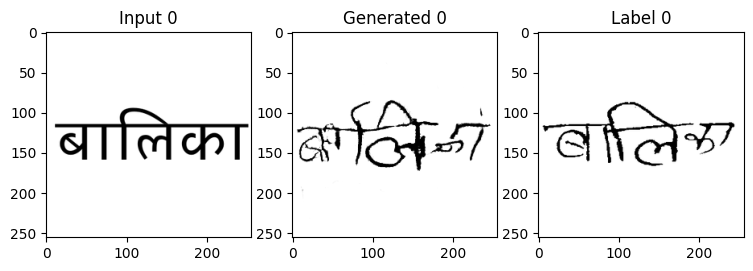

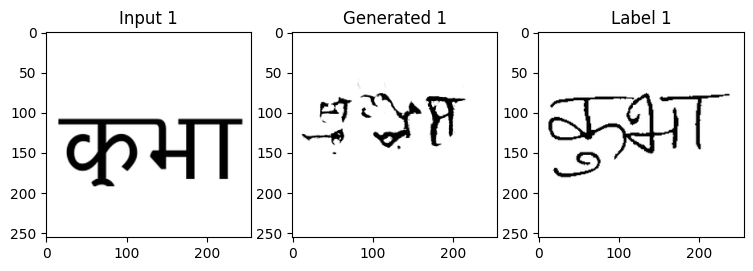

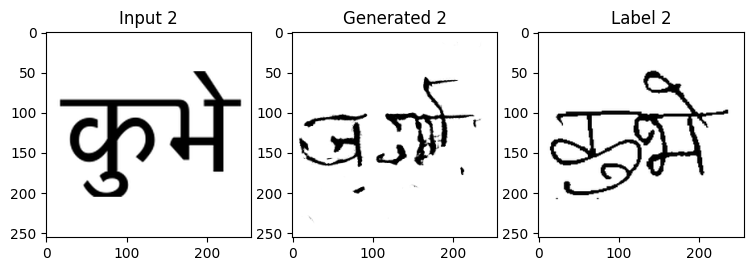

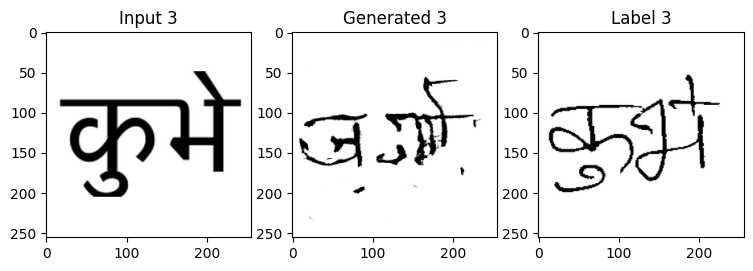

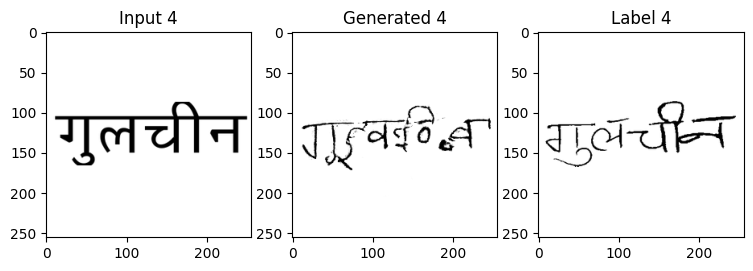

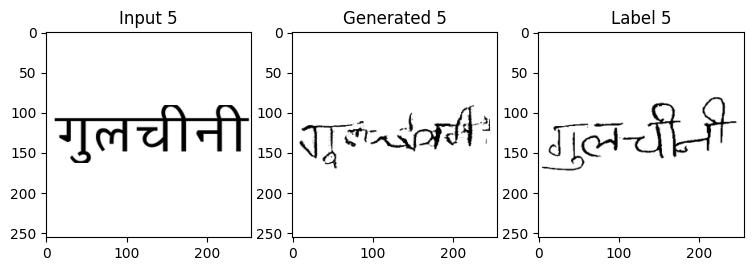

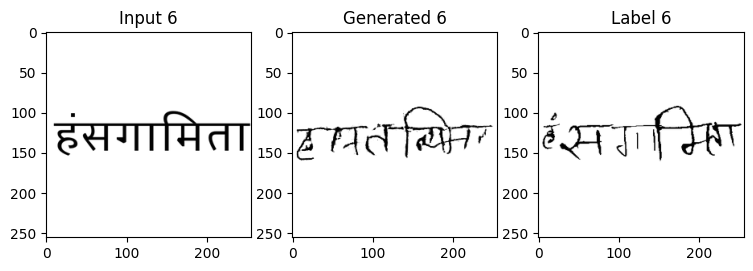

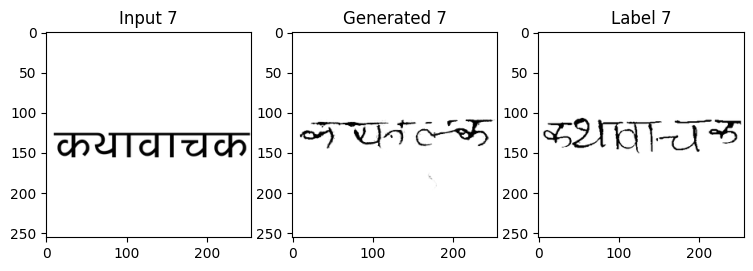

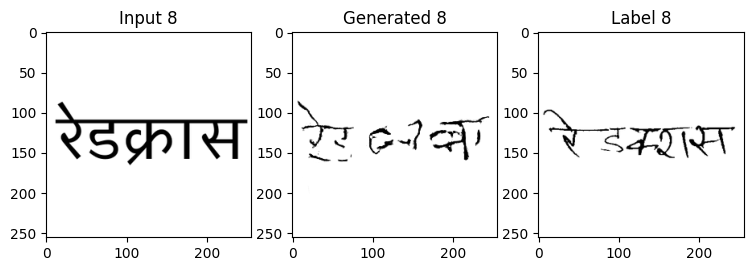

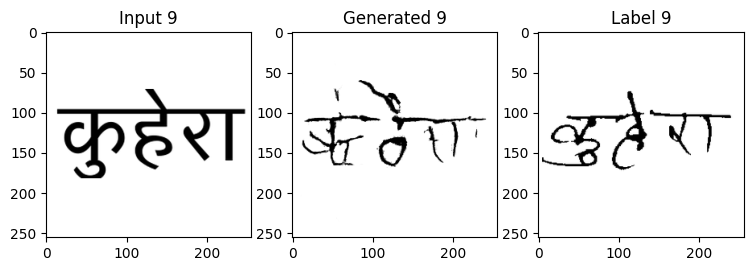

100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


In [5]:
loop = tqdm(val_loader, leave=True)

for idx, (x, y) in enumerate(loop):
    x = x.to(config.DEVICE)
    y = y.to(config.DEVICE)

    # Train Discriminator
    with torch.amp.autocast('cuda'):
        y_fake = gen(x)
        for i in range(10):
            plt.figure(figsize=(9, 3))
            plt.subplot(1, 3, 1)
            plt.imshow(x[i].detach().cpu().numpy()[0], cmap='gray')
            plt.title(f'Input {i}')
            plt.subplot(1, 3, 2)
            plt.imshow(y_fake[i].detach().cpu().numpy()[0], cmap='gray')
            plt.title(f'Generated {i}')
            plt.subplot(1, 3, 3)
            plt.imshow(y[i].detach().cpu().numpy()[0], cmap='gray')
            plt.title(f'Label {i}')
            plt.show()